Comparing Covid 19 Deaths by State using SQL prompts

Date: 1/22/2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hospital_df = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")

In [3]:
#for col in hospital_df.columns:
 #print(col)

In [4]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57521 entries, 0 to 57520
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(77), int64(56), object(2)
memory usage: 59.2+ MB


In [5]:
hospital_df2 = hospital_df.dropna()

In [6]:
first = hospital_df.shape
second = hospital_df2.shape
print(f"the size of the unstripped data = {first[0]} rows, the size of the stripped data = {second[0]} rows.")

the size of the unstripped data = 57521 rows, the size of the stripped data = 0 rows.


1. Performing a quick dropna did not work for this dataset. Every row must have NaN values.

In [7]:
print("The column Inpatient beds contains NaN = %s " % hospital_df.inpatient_beds.isnull().values.any())

The column Inpatient beds contains NaN = True 


In [8]:
hospital_df2 = hospital_df.dropna(subset='inpatient_beds')

In [9]:
first = hospital_df.shape
second = hospital_df2.shape
print(f"the size of the unstripped data = {first[0]} rows, the size of the stripped data = {second[0]} rows.")

the size of the unstripped data = 57521 rows, the size of the stripped data = 57516 rows.


2. Instead of stripping all the NaN values from the dataset, I decided to strip the NaN values just from the column with the total number of inpatient beds.

In [10]:
state_date = hospital_df2.duplicated(subset=['state', 'date'])
state_date.value_counts()

False    57516
dtype: int64

3. This should be proof enough that there are no duplicate rows. Using the above method, I was able to find that each row has a unique state & date combined value.

In [11]:
hospital_df2 = hospital_df2.drop(['on_hand_supply_therapeutic_a_casirivimab_imdevimab_courses','on_hand_supply_therapeutic_b_bamlanivimab_courses','on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses'], axis=1)

In [12]:
hospital_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57516 entries, 0 to 57520
Columns: 132 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(74), int64(56), object(2)
memory usage: 58.4+ MB


4. In the above part, I started dropping some columns that had mostly NaN values.

In [13]:
#hospital_df2.deaths_covid.unique()

In [14]:
nan_values = hospital_df2[hospital_df2['deaths_covid'].isna()]
nan_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 69 to 47235
Columns: 132 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(74), int64(56), object(2)
memory usage: 1.1+ MB


In [15]:
hospital_df3 = hospital_df2.dropna(subset='deaths_covid')
hospital_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56429 entries, 0 to 57520
Columns: 132 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(74), int64(56), object(2)
memory usage: 57.3+ MB


5. Upon further inspection, I found 1087 rows with no data for covid deaths. This isn't good if my goal is to look into covid deaths or other covid related issues.

In [16]:
state_deaths = pd.DataFrame(data = hospital_df3, columns = ['state', 'deaths_covid'])
#state_deaths.boxplot()

In [17]:
hospital_outliers = hospital_df3[(hospital_df3['deaths_covid'] > 1000)]
hospital_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 13008 to 21594
Columns: 132 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(74), int64(56), object(2)
memory usage: 17.7+ KB


In [18]:
hospital_outliers_sub = hospital_outliers[['state', 'date', 'deaths_covid']]
print(hospital_outliers_sub)

      state        date  deaths_covid
13008    NY  2020/06/03        2193.0
13873    NY  2020/05/27        2243.0
14641    NY  2020/05/18        2138.0
14986    NY  2020/05/29        2180.0
15094    NY  2020/05/26        2190.0
17133    NY  2020/05/20        2144.0
17263    NY  2020/05/21        2158.0
17506    NY  2020/05/22        2151.0
18177    NY  2020/05/24        2153.0
18204    NY  2020/05/30        2186.0
19197    NY  2020/05/23        2166.0
19265    NY  2020/05/31        2183.0
19697    NY  2020/05/28        2251.0
20021    NY  2020/05/25        2181.0
20304    NY  2020/05/19        2127.0
20990    NY  2020/06/01        2200.0
21594    NY  2020/06/02        2190.0


6. In the above portion, I wanted to see if there were any outliers in the number of covid deaths reported. The boxplot showed me there were outliers. I seperated out the extreme outliers and displayed them. It is interesting that they are all from New York within about a 2 week time frame.

In [19]:
hospital_df4 = hospital_df3[(hospital_df3['deaths_covid'] < 1000)]
hospital_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56412 entries, 0 to 57520
Columns: 132 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(74), int64(56), object(2)
memory usage: 57.2+ MB


7. I decided that those outliers were too much for the rest of the data and dropped them. However, I do think that that data should be looked into for why those outliers were reported.

In [20]:
pd.options.display.max_rows = 4000
#hospital_df4.isnull().sum()

In [21]:
hospital_df5= hospital_df4.dropna(thresh=len(hospital_df4) - 200, axis=1)
#hospital_df5.isnull().sum()

8. I summed all the columns number of NaN values. Then I stripped all the columns with the most egregious number of missing values.

In [22]:
#hospital_df5.head()

My last dataframe I made still has some NaN values in it, as can be seen from the output, but I think I made
a good start on condensing the important columns down. I stripped all the columns with the most
egregious number of missing values. Unfortunately, the data transformations for this kind of important data
need to be small and methodical as each change needs to be heavily considered if a proper study is to be
done at the end. The last few columns with missing data need to be investigated before I just cut them out.
So far, I have already cut a lot of data out of the original dataset. This may lead to modeling that does not
reflect any applicable real world scenario. The boxplot analysis of the dataset does make me question the
validity/thoroughness of the data. Much of the data entered is either 0 or a small number. I have my doubts
about the accuracy of that data. It is possible the source of the dataset was not receiving all the information
it should have been. It then makes me question whether the New York entries that I stripped were closer to
the correct numbers or not.

Dustin Snow

DSC540

Project Milestone 3

Date: 2/5/2023

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
url = 'https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/United_States_medical_cases_by_state#covid-19-pandemic-in-united-states-by-location'

In [25]:
df = pd.read_html(url)

In [26]:
#df[1]

In [27]:
cov_html = df[1]

In [28]:
cov_html.columns

Index(['Unnamed: 0', 'Location[i]', 'Cases[ii]', 'Deaths', 'Recoveries[iii]',
       'Hospital[iv]', 'Ref.'],
      dtype='object')

First = Delete the two unnecessary columns.

In [29]:
cov_html=cov_html.drop(columns=['Unnamed: 0', 'Ref.'])
#cov_html

Second = Drop the three unnecessary rows.

In [30]:
cov_html = cov_html.drop(cov_html.index[[0,57,58]])
#cov_html

Third = Make column names more readable.

In [31]:
cov_html.rename(columns= {'Location[i]':'Location', 'Cases[ii]':'Cases', 'Recoveries[iii]':'Recoveries',
       'Hospital[iv]':'Hospitalizations'}, inplace=True)

In [32]:
#cov_html

In [33]:
cov_html['Recoveries'].isnull().values.any()

False

In [34]:
print(cov_html['Recoveries'].values)

['275245' '7165' '3' '—' '306382' '—' '—' '—' '18371' '28532' '—' '—'
 '7377' '11385' '92573' '—' '1749284' '286309' '—' '47067' '396834'
 '12772' '—' '477796' '2747446' '1447550' '273437' '—' '260525' '142336'
 '—' '70040' '—' '135608' '150100' '2640452' '97286' '29' '2640920'
 '401945' '—' '816884' '—' '—' '—' '107745' '738731' '4,260,877[vi]'
 '2483' '346157' '34184' '—' '—' '119337' '545562' '52688']


Fourth = replace the line symbol in two of the columns with NaN

In [35]:
cov_html = cov_html.replace('—', np.nan)
cov_html = cov_html.replace('4,260,877[vi]', '4260877')
print(cov_html['Recoveries'].values)

['275245' '7165' '3' nan '306382' nan nan nan '18371' '28532' nan nan
 '7377' '11385' '92573' nan '1749284' '286309' nan '47067' '396834'
 '12772' nan '477796' '2747446' '1447550' '273437' nan '260525' '142336'
 nan '70040' nan '135608' '150100' '2640452' '97286' '29' '2640920'
 '401945' nan '816884' nan nan nan '107745' '738731' '4260877' '2483'
 '346157' '34184' nan nan '119337' '545562' '52688']


In [36]:
print(cov_html['Hospitalizations'].values)

['45250' '1260' nan '57072' '14617' nan '23293' '12257' nan nan '78472'
 '55167' nan '2196' '7007' nan '152177' nan '9103' '18768' nan '1511'
 '34577' '19176' nan '63295' '9012' nan '11589' '6048' nan '1095' '63190'
 '12989' '89995' nan '3859' '4' '115481' '23700' '8457' nan nan '8835' nan
 '6548' '18311' nan nan '14520' nan '41373' '19110' nan '25838' '1373']


Fifth = Replace the nan value in the Recoveries column with the average of the column.

I decided to do this because the other columns are not exactly cases-deaths=recoveries. So I think the average may be an alright data point for the states that didn't report enough data.

In [37]:
cov_html["Recoveries"] = pd.to_numeric(cov_html["Recoveries"], downcast="float")
cov_html["Cases"] = pd.to_numeric(cov_html["Cases"], downcast="float")
cov_html["Deaths"] = pd.to_numeric(cov_html["Deaths"], downcast="float")
cov_html["Hospitalizations"] = pd.to_numeric(cov_html["Hospitalizations"], downcast="float")

# converted all the numerical columns to floats for easier use

In [38]:
meanrecov = cov_html['Recoveries'].mean()

In [39]:
cov_html['Recoveries'].fillna(value=meanrecov, inplace=True)
#cov_html

Sixth = Upon further inspection, my above method isn't going to work for Rhode Island. It doesn't make sense to have more recoveries than cases. There is no good method to change this based off other states' reporting, as they are all over with their reporting. In this case I think a quick cases-deaths will be sufficient.

In [40]:
print(406546-3674)

402872


In [41]:
cov_html.at[44, 'Recoveries']=402872
#cov_html

In [42]:
#states = pd.DataFrame(data = cov_html, columns = ['Location', 'Cases'])
#states.boxplot()

The data for this project milestone comes from a Wikipedia table. I first had to have pandas read the url and extract all the tables from the webpage. Then I had to figure out what the table I wanted was indexed at. Initially my table was extremely unreadable and/or had poor formatting. I had to drop a couple of columns and rows as they were deemed unnecessary for the project. This should not have any ethical implications as they contained filler data useful for a webpage but not a python project. The first major transformation I needed was to convert a symbol value in the table to NaN in order to make it more useable/understandable. Next, I needed to make the column names as well as one of the row values easier to use because they still contained extra symbols from the quick-links in the website. The Recoveries column initially had a lot of missing values. I decided to fill them with the average of the column. I felt this would be a somewhat realistic value after comparing the case numbers and death numbers. Some states will have underreporting and some with have overreporting with this method, but I do not think this will have drastic ethical implications as long as the value is under the number of total cases minus the total deaths reported. Because of this, I had to change the Rhode Island value to its reported cases minus reported deaths to find the number of recoveries as the mean value for the column would be too high. I do have my reservations about this because it could be severe over representation of the real value, but, at present, I do not have a better method. I left the Hospitalizations column alone because I did not feel there was an ethical way to fill in the NaN values without finding another dataset. I did use a boxplot to look for some outliers in the number of cases reported at the end. I haven’t decided what to do with the few outliers on the boxplot because I do not necessarily think they are miss reported. Some states may have had better reporting when this table was compiled. I believe it would be ethically wrong to try to change the values. 

Dustin Snow

Project Milestone 4

DSC540

Date: 2/19/2023

In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import urllib.parse
import urllib.error
import ssl
import re
import json

In [44]:
url = 'https://disease.sh/v3/covid-19/historical/all?lastdays=all'
url2 = 'https://disease.sh/v3/covid-19/countries/usa'
url3 = 'https://disease.sh/v3/covid-19/states'
# url = world data
# url2 = usa as a whole data
# url3 = states' data

In [45]:
r = requests.get(url)
r2 = requests.get(url2)
r3 = requests.get(url3)

In [46]:
r

<Response [200]>

In [47]:
r2

<Response [200]>

In [48]:
r3

<Response [200]>

In [49]:
json = r.json()
json2 = r2.json()
json3 = r3.json()

In [50]:
json.keys()

dict_keys(['cases', 'deaths', 'recovered'])

In [51]:
json2.keys()

dict_keys(['updated', 'country', 'countryInfo', 'cases', 'todayCases', 'deaths', 'todayDeaths', 'recovered', 'todayRecovered', 'active', 'critical', 'casesPerOneMillion', 'deathsPerOneMillion', 'tests', 'testsPerOneMillion', 'population', 'continent', 'oneCasePerPeople', 'oneDeathPerPeople', 'oneTestPerPeople', 'activePerOneMillion', 'recoveredPerOneMillion', 'criticalPerOneMillion'])

In [52]:
#json3

In [53]:
states = pd.DataFrame(json3)

    1. Remove some of the extra rows for territories that are not applicable to the project.

In [54]:
states = states.head(51)

In [55]:
#states

    2. Make a new column that actually calculates the number of recovered individuals.

In [56]:
states = states.assign(recovered_actual=states['cases']-states['deaths']-states['active'])

In [57]:
#states

    3. Drop the old recovered column.

In [58]:
states = states.drop(['recovered'], axis=1)
#states

    4. Drop the 'updated' column.

In [59]:
states = states.drop(['updated'], axis=1)
#states

    5. Create a new column showing the percent of the population that have had a case.

In [60]:
states = states.assign(percent_pop=states['cases']/states['population']*100)
states = states.round({'percent_pop': 2})
#states

    6. Create a new column for tests per person.

In [61]:
states = states.assign(tests_per_person=states['tests']/states['population'])
states = states.round({'tests_per_person': 2})
#states

    7. Make another new column based on the tests per person column.

In [62]:
def categorize(row):
    if row['tests_per_person'] >= 2:
        return 'Acceptable'
    else:
        return 'Unacceptable'

In [63]:
states['Number_of_Tests_for_State'] = states.apply(lambda row: categorize(row), axis=1)
#states

In [64]:
states2 = states[['state', 'recovered_actual', 'percent_pop', 'tests_per_person', 'Number_of_Tests_for_State']].copy()
#states2

For this project milestone, I began by pulling API data from three different URLs. They are all the same API, this is just how they have their pull requests set up. The first pull was for world data, the second was for the US, and the last was for each state individually. All this data is Covid-19 data. I wanted all three pull requests ready to go in case I wanted to use the extra data for the final milestone, but it is likely that this project will focus on each state individually so that is what I focused on for this milestone. The pull request ended up being a dictionary of json data for the states that I was then able to convert into a pandas dataframe. There were some extra territories in the original pull data that I cut out first because that information would not be as relevant for this project. Next, the recovered column in the original data was missing a lot of data, so I created a new column with a formula that would calculate the number of people recovered from Covid-19. After that, I dropped the old recovered column from the dataframe and then dropped the useless ‘updated’ column. I left two columns in that are full of zeros out of curiosity even though they will likely have to use in the future. I am interested to see if I ever pull data from the API and there is data in those columns as it updates. The next three transformations were making new columns based on the data. I wanted to know what percent of the population has had a case, how many tests there were per person, and whether the amount of tests was acceptable. Acceptability was based on whether there were 2 or more tests available per person. It is possible to have a false negative when taking a test, so I felt that having two available per person was acceptable to have a reliable testing standard. Fortunately, the ethical impact of this part of the project is minimal. I mainly added information using the data at hand and fixed a column that was not functioning correctly. The real ethical impact would be if these reported numbers are wrong. However, I know this API gets its data from one of the leading Covid-19 data trackers, so the possibility of this is low.  

Dustin Snow

DSC540

Project Milestone 5

Date: 3/4/2023

In [65]:
import sqlite3

In [66]:
#states

In [67]:
#cov_html

In [68]:
hospital_df5

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,total_patients_hospitalized_confirmed_influenza_coverage,all_pediatric_inpatient_bed_occupied_coverage,all_pediatric_inpatient_beds_coverage,previous_day_admission_pediatric_covid_confirmed_0_4_coverage,previous_day_admission_pediatric_covid_confirmed_12_17_coverage,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds_coverage
0,RI,2021/02/14,4,10,1,4,10,1,14.0,14,...,14,14,14,0,0,0,0,0,14,14
1,MA,2021/01/30,10,90,1,11,89,1,83.0,100,...,100,0,0,0,0,0,0,0,0,0
2,NM,2021/01/30,16,38,1,16,38,1,3.0,54,...,54,20,20,0,0,0,0,0,20,20
3,KS,2021/01/29,11,135,4,15,131,4,4.0,147,...,147,147,147,0,0,0,0,0,147,147
4,SD,2021/01/29,2,60,3,2,60,3,25.0,62,...,62,62,62,0,0,0,0,0,62,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57516,RI,2021/08/13,5,8,2,5,8,2,0.0,14,...,6,14,14,0,0,0,0,0,14,14
57517,KY,2021/04/11,0,25,92,3,112,2,0.0,115,...,115,25,25,0,0,0,0,0,25,25
57518,TX,2021/04/13,107,472,11,125,454,11,95.0,585,...,585,38,38,0,0,0,0,0,38,38
57519,OR,2021/07/10,2,53,8,2,53,8,9.0,61,...,57,49,49,0,0,0,0,0,49,49


In [69]:
#conn = sqlite3.connect('states_api.db')

In [70]:
#states.to_sql('states', conn, if_exists='replace')

In [71]:
cov_html = cov_html.drop([3,13,38,43,49])
#cov_html

In [72]:
cov_html = cov_html.rename(columns = {'Location': 'state'})
#cov_html

In [73]:
cov_html['state'] = cov_html['state'].replace(['Florida[v]'], 'Florida')
#cov_html

In [74]:
cov_html = cov_html.reset_index()
#cov_html

In [75]:
cov_html = cov_html.drop(['index'], axis=1)
cov_html

,state,Cases,Deaths,Recoveries,Hospitalizations
0,Alabama,1627670.0,20892.0,275245.0,45250.0
1,Alaska,291752.0,1436.0,7165.0,1260.0
2,Arizona,2404386.0,32936.0,572353.0,57072.0
3,Arkansas,998837.0,12905.0,306382.0,14617.0
4,California,12023397.0,99695.0,572353.0,NaN
5,Colorado,1751281.0,14062.0,572353.0,23293.0
6,Connecticut,969335.0,12037.0,572353.0,12257.0
7,Delaware,327873.0,3288.0,18371.0,NaN
8,District of Columbia,176845.0,1425.0,28532.0,NaN
9,Florida,7483857.0,85710.0,572353.0,78472.0


In [76]:
cov_html['Hospitalizations'] = cov_html['Hospitalizations'].fillna(0)
cov_html = cov_html.astype({'Cases': int, 'Deaths': int, 'Recoveries': int, 'Hospitalizations': int})

In [77]:
states = states.sort_values('state')
#states

In [78]:
states = states.astype({'percent_pop': int, 'tests_per_person': int})

In [79]:
states = states.reset_index()
states = states.drop(['index'], axis=1)
states

# finished making some minor
# changes to my datasets

,state,cases,todayCases,deaths,todayDeaths,active,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,population,recovered_actual,percent_pop,tests_per_person,Number_of_Tests_for_State
0,Alabama,1642062,0,21001,0,70198,334897,4283,9096834,1855291,4903185,1550863,33,1,Unacceptable
1,Alaska,293315,0,1449,0,3140,400953,1981,4752109,6495990,731545,288726,40,6,Acceptable
2,Arizona,2407765,0,33003,0,11087,330795,4534,21897403,3008415,7278717,2363675,33,3,Acceptable
3,Arkansas,1005790,0,13001,0,3089,333285,4308,8009101,2653950,3017804,989700,33,2,Acceptable
4,California,12090178,0,101202,0,134479,305986,2561,196643155,4976768,39512223,11854497,30,4,Acceptable
5,Colorado,1761324,0,14954,0,18856,305853,2597,21219609,3684768,5758736,1727514,30,3,Acceptable
6,Connecticut,975537,0,12187,0,10159,273621,3418,16591663,4653668,3565287,953191,27,4,Acceptable
7,Delaware,330793,0,3324,0,3931,339706,3414,1026007,1053651,973764,323538,33,1,Unacceptable
8,District Of Columbia,177215,0,1426,0,2201,251102,2021,3067883,4346989,705749,173588,25,4,Acceptable
9,Florida,7516906,0,86294,0,51890,349986,4018,66009459,3073390,21477737,7378722,35,3,Acceptable


In [80]:
#conn = sqlite3.connect('states_api.db')
#states.to_sql('states', conn, if_exists='replace')
#conn.close()

In [81]:
#conn = sqlite3.connect('cov_html.db')
#cov_html.to_sql('cov', conn, if_exists='replace')
#conn.close()

In [82]:
#conn = sqlite3.connect('hospital_csv.db')
#hospital_df5.to_sql('hospital', conn, if_exists='replace')
#conn.close()

# made three individual sql databases
# decided that wasn't the best way

In [83]:
conn = sqlite3.connect('combined.db')
hospital_df5.to_sql('hospital', conn, if_exists='replace')
states.to_sql('states', conn, if_exists='replace')
cov_html.to_sql('cov', conn, if_exists='replace')
conn.close()
# created one sql database with all three of my 
# tables

In [84]:
conn1 = sqlite3.connect("combined.db")
c = conn1.cursor()

In [85]:
import matplotlib.pyplot as plt

First Visualization

In [86]:
sql = """SELECT recovered_actual, state FROM states GROUP BY state ORDER BY recovered_actual desc"""

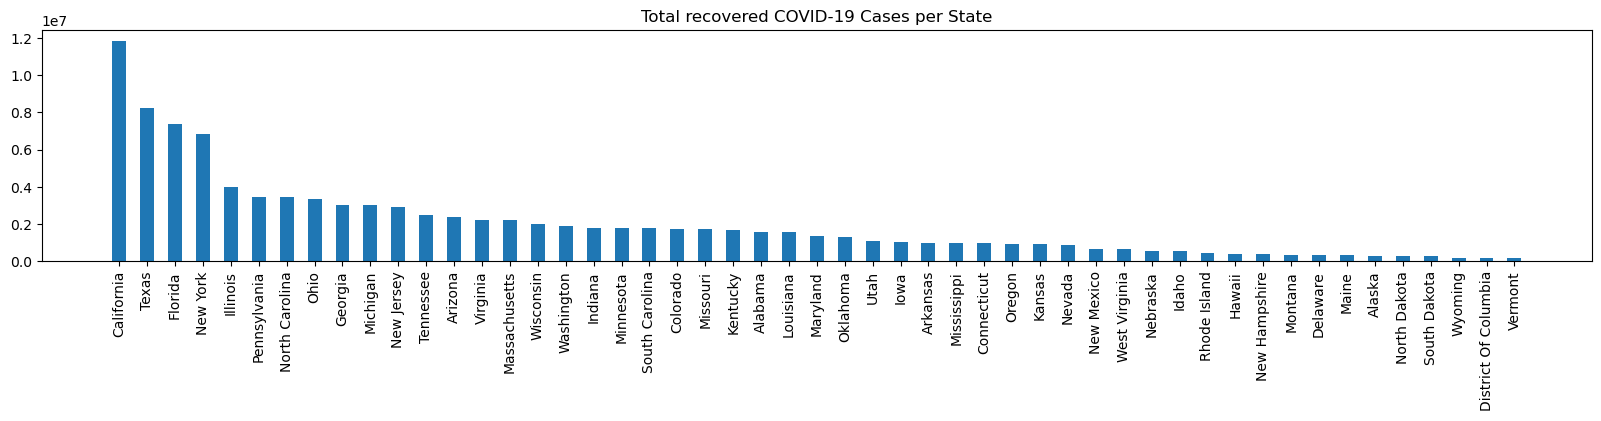

In [87]:
data = pd.read_sql(sql, conn1)
plt.figure(figsize=(20, 3))
plt.bar(data.state, height = data.recovered_actual, width = .5)
plt.title("Total recovered COVID-19 Cases per State")
plt.xticks(rotation=90)
plt.show()

Second Visualization

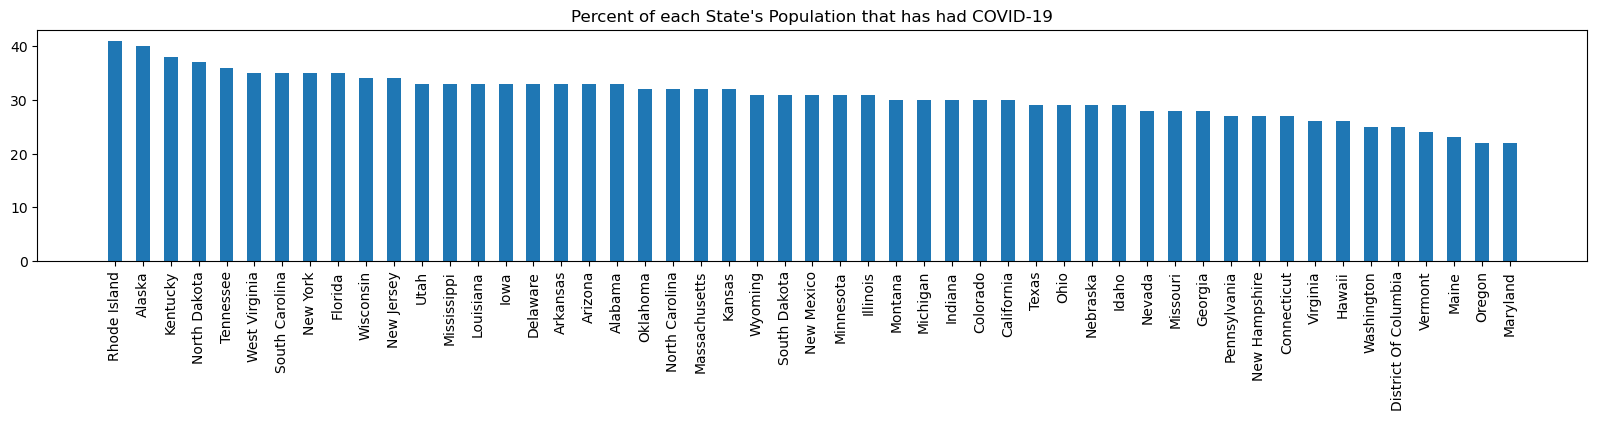

In [88]:
sql = """SELECT percent_pop, state FROM states GROUP BY state ORDER BY percent_pop desc"""
data = pd.read_sql(sql, conn1)
plt.figure(figsize=(20, 3))
plt.bar(data.state, height = data.percent_pop, width = .5)
plt.title("Percent of each State's Population that has had COVID-19")
plt.xticks(rotation=90)
plt.show()

Third Visualization

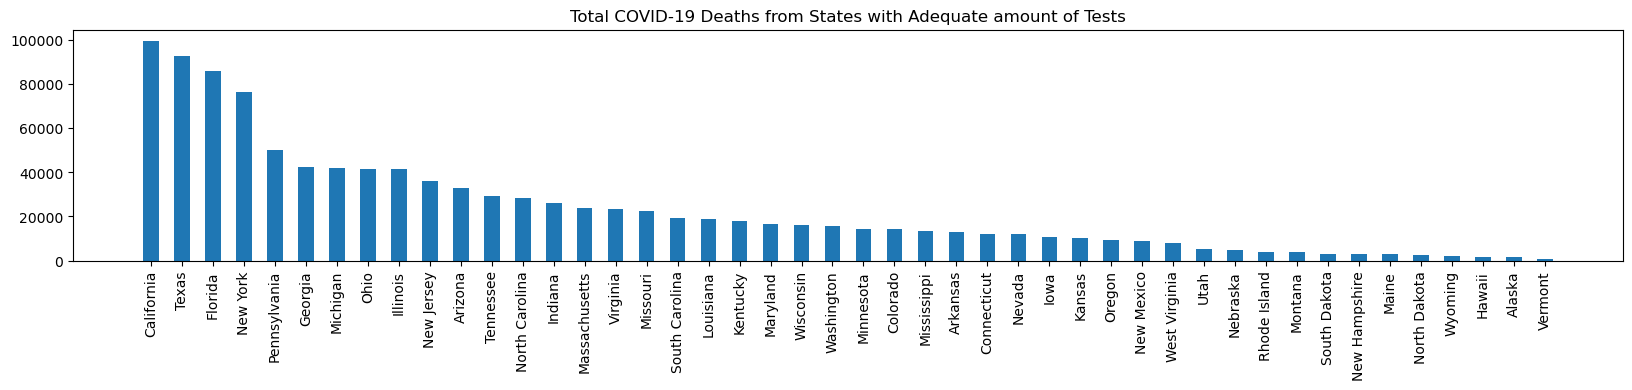

In [89]:
sql = """SELECT cov.Deaths, cov.state FROM cov JOIN states on cov.state = states.state WHERE states.Number_of_Tests_for_State='Acceptable' ORDER BY cov.Deaths desc"""
data = pd.read_sql(sql, conn1)
plt.figure(figsize=(20, 3))
plt.bar(data.state, height = data.Deaths, width = .5)
plt.title("Total COVID-19 Deaths from States with Adequate amount of Tests")
plt.xticks(rotation=90)
plt.show()

Fourth Visualization

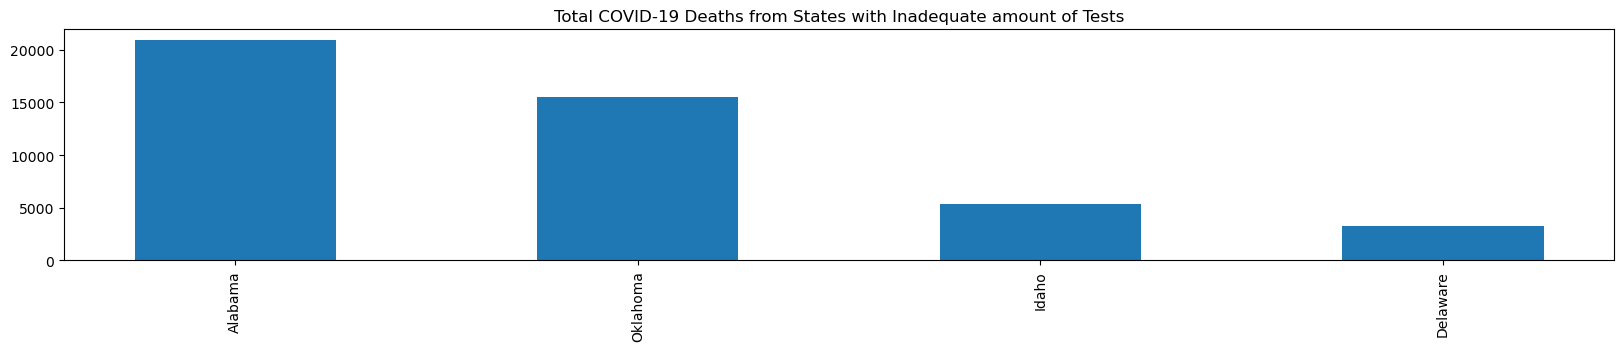

In [90]:
sql = """SELECT cov.Deaths, cov.state FROM cov JOIN states on cov.state = states.state WHERE states.Number_of_Tests_for_State='Unacceptable' ORDER BY cov.Deaths desc"""
data = pd.read_sql(sql, conn1)
plt.figure(figsize=(20, 3))
plt.bar(data.state, height = data.Deaths, width = .5)
plt.title("Total COVID-19 Deaths from States with Inadequate amount of Tests")
plt.xticks(rotation=90)
plt.show()

Fifth Visualization

In [91]:
def hex_to_RGB(hex_str):
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

# I had made a pie chart previously,
# but I was unhappy with how the colors
# looked. Found a good solution online
# that made it look much more professional.

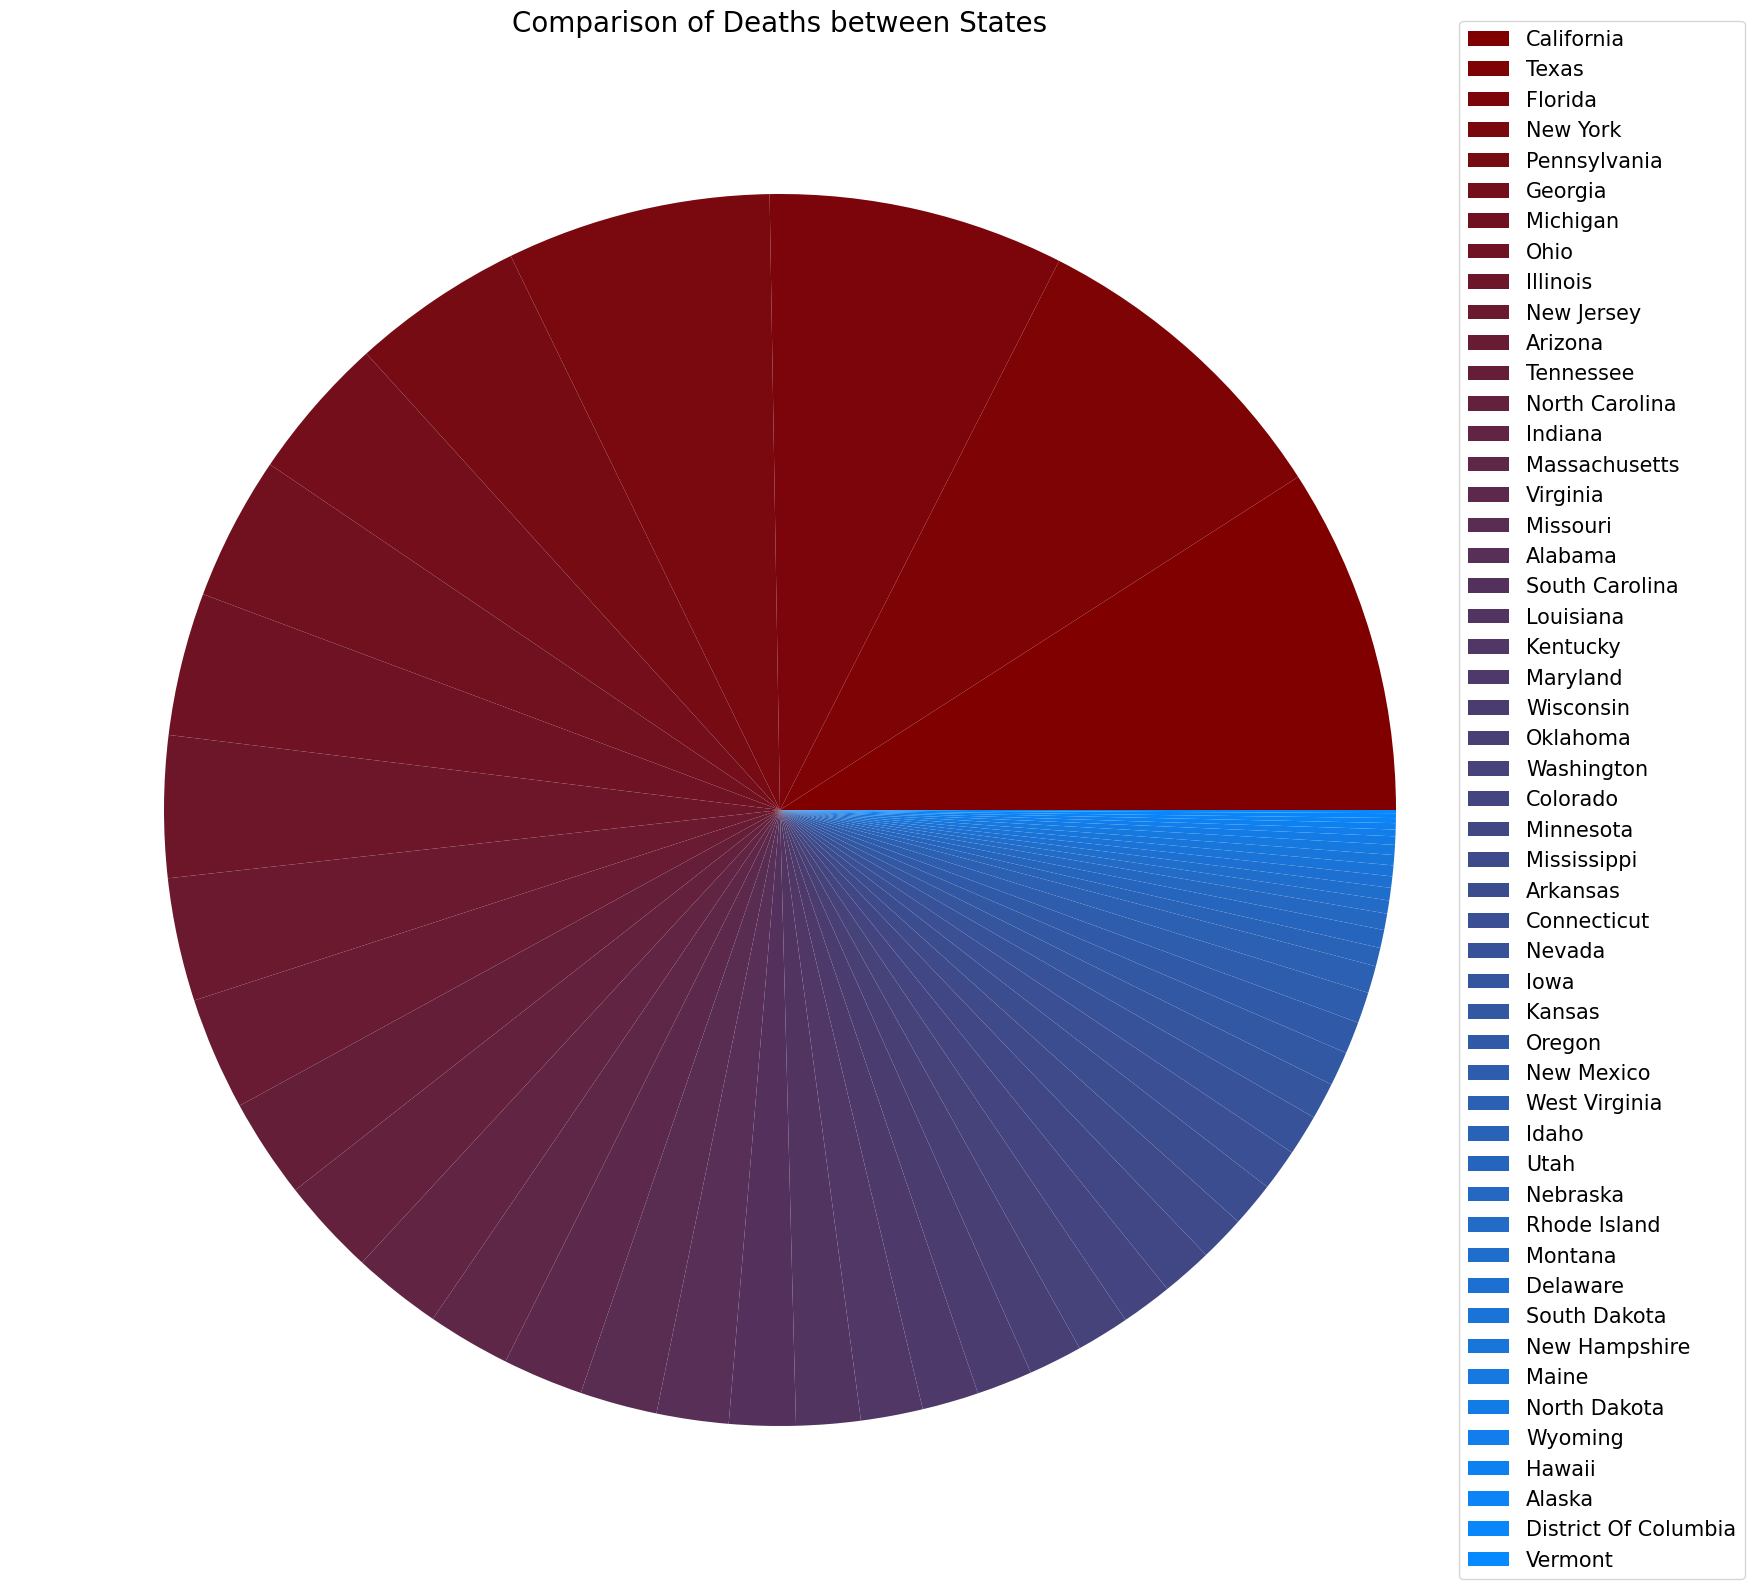

In [92]:
sql = """SELECT Deaths, state FROM states GROUP BY state ORDER BY Deaths desc"""
color1 = '#800000'
color2 = '#0789FF'
data = pd.read_sql(sql, conn1)
dict1 = dict(data.state.value_counts().sort_index())
plt.figure(figsize=(20,20))
pie = plt.pie(data.deaths, colors = get_color_gradient(color1, color2, len(dict1)))
plt.legend(pie[0],data.state, bbox_to_anchor=(1,0.5), loc="center right", fontsize=15, bbox_transform=plt.gcf().transFigure)
plt.title("Comparison of Deaths between States", fontsize=20)
plt.show()

This project was a nice challenge from start to finish. In the beginning, it was not that bad finding data that may work for the project. What I didn’t understand at the beginning was that such variance in the data and columns can make the end visualizations rather difficult to put together. A lot of my transformations at the end involved making a column that would be common across the datasets. I had also never worked with most of the data types used in the project. Pandas makes retrieving and then working with various data types much easier than expected. SQL took a while to learn, but, after some initial frustration, the queries are very intuitive when looking to create good visualizations and comparisons. I plan to continue to iterate upon my final project, and continue to explore the kinds of data visualizations that can be made. I understand that I stuck to basic ones for the submission of the project, but I didn’t want to get overly bogged down trying to create something very complex and lose time. I also learned that sometimes solutions to odd problems need to be found through searching online. I did not like the look of the basic charts that matplotlib can generate, and I found that it doesn’t have an innate color gradient function. I finally found a function that made matplotlib plots much more visually appealing and professional, and I plan to hold onto that function for the future. The most important area I gained knowledge in were the ethical implications in data wrangling. I was working with health data for this project. Luckily, I did not have to face any ethical implications with health data on the individual level. I did find that there were points where I could skew the data in such a way as to generate a narrative, which would have bad ethical implications. For my data, this could lead to the audience of my data generating poor/unwarranted views of some of the states who’s COVID-19 data I had compiled. Those were just points where I had a clear understanding of where I could influence the data. There are other points that could just be accidental. For example, in one of the datasets, I had read the meaning behind one of the columns wrong and was about to make a bunch of transformations based on that understanding until I had gone back and reread the data. This would have unintentionally generated a bunch of poor data points. This really hammered home the reality of why data wrangling/transformation is the longest step and one of (if not) the most important steps in the data science process. 